In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

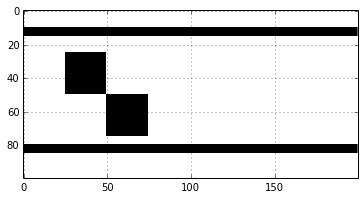

In [3]:
a = np.zeros((100,200))
a[25:50,25:50]=np.ones((25,25))
a[50:75,50:75]=np.ones((25,25))
a[10:15,...]=np.ones((5,200))
a[80:85,...]=np.ones((5,200))
plt.grid()
plt.imshow(a,cmap="Greys",interpolation='none')

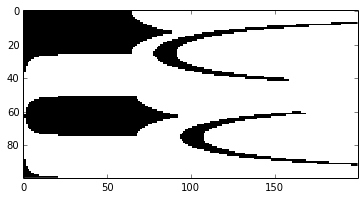

In [6]:
b=cv2.linearPolar(a,(50,50),75.0,flags=cv2.WARP_FILL_OUTLIERS)
plt.imshow(b,cmap="Greys",interpolation='none')
plt.show()

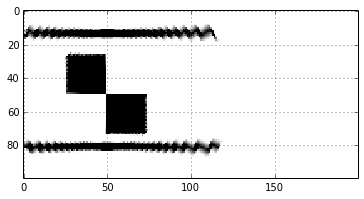

In [7]:
c=cv2.linearPolar(b,(50.0,50.0),75.0,flags=cv2.WARP_FILL_OUTLIERS+cv2.WARP_INVERSE_MAP+cv2.INTER_LINEAR)
plt.imshow(c,cmap="Greys",interpolation='none')
plt.grid()
plt.show()

In [8]:
im2, contours, hierarchy = cv2.findContours(b.astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

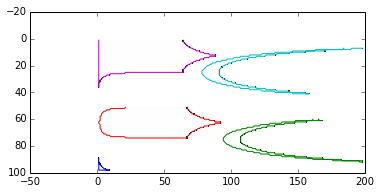

In [9]:
plt.imshow(im2,cmap='Greys',interpolation='none')
for contour in contours:
    pts=contour[:,0].copy()
    plt.plot(pts[:,0],pts[:,1])
ax=plt.gca()

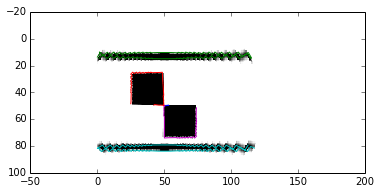

In [19]:
plt.imshow(c,cmap='Greys',interpolation='none')
for ix,contour in enumerate(contours):
    pts=contour[:,0].copy().astype(np.float32)
    pts[:,1]=pts[:,1]/float(100.0)*360.0*np.pi/180.0
    pts[:,0]=pts[:,0]/200.0*75.0
    x=pts[:,0]*np.cos(pts[:,1])+50.0
    y=pts[:,0]*np.sin(pts[:,1])+50.0
    
    plt.plot(x,y)
    
plt.show()

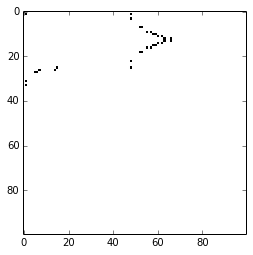

In [272]:
mask=np.zeros((100,100))
for contour in contours[4:5]:
    c = contour[:,0]
    mask[c[:,1],c[:,0]] = 1.0

plt.imshow(mask,cmap='Greys',interpolation='none')

In [273]:
maskout=cv2.linearPolar(mask,(50.0,50.0),
                      50.0,
                      flags=cv2.WARP_FILL_OUTLIERS+cv2.WARP_INVERSE_MAP)

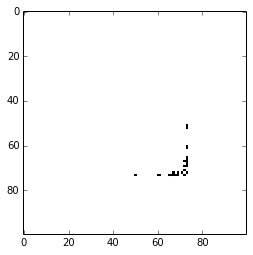

In [274]:
plt.imshow(maskout,cmap='Greys',interpolation='none')